In [37]:
import json
import pandas as pd
from pandas.io.json import json_normalize
import os
from tqdm import tqdm
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import random

In [38]:
need_contorl = ['if_muti_developers','if_famous_developer','if_muti_publishers','if_famous_publishers','if_franchiser',
                'award_bool','hot_rate','if_muti_sys','DLC_bool'] #,'curator']
need_split = ['rating','languages','price','features']

need_year = [2018,2019,2020,2021]

In [18]:
 need_cro = [
 'if_muti_developers',
 'if_famous_developer',
 'if_muti_publishers',
 'if_famous_publishers',
 'if_franchiser',
 'award_bool',
 'if_muti_sys',
 'DLC_bool',
 'price_free',
 'price_0_10',
 'price_10_20',
 'price_20_',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021']

In [19]:
contorl_name_lists = [
 'if_muti_developers',
 'if_famous_developer',
 'if_muti_publishers',
 'if_famous_publishers',
 'if_franchiser',
 'award_bool',
 'if_muti_sys',
 'DLC_bool',
 'rating_ao',
 'rating_e',
 'rating_e10',
 'rating_ec',
 'rating_m',
 'rating_rp',
 'rating_t',
 'price_free',
 'price_0_10',
 'price_10_20',
 'price_20_',
 'language_Arabic',
 'language_Bulgarian',
 'language_Czech',
 'language_Danish',
 'language_Dutch',
 'language_English',
 'language_Finnish',
 'language_French',
 'language_German',
 'language_Greek',
 'language_Hungarian',
 'language_Italian',
 'language_Japanese',
 'language_Korean',
 'language_Norwegian',
 'language_Polish',
 'language_Portuguese',
 'language_Romanian',
 'language_Russian',
 'language_Slovakian',
 'language_Swedish',
 'language_Thai',
 'language_Turkish',
 'language_Ukrainian',
 'language_Vietnamese',
 'language_Portuguese___Brazil',
 'language_Simplified_Chinese',
 'language_Spanish___Latin_America',
 'language_Spanish___Spain',
 'language_Traditional_Chinese',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021',
 'cat_action_beat_em_up',
 'cat_action_fps',
 'cat_action_rogue_like',
 'cat_action_run_jump',
 'cat_action_tps',
 'cat_adventure_rpg',
 'cat_anime',
 'cat_arcade_rhythm',
 'cat_casual',
 'cat_exploration_open_world',
 'cat_fighting_martial_arts',
 'cat_horror',
 'cat_metroidvania',
 'cat_multiplayer_coop',
 'cat_multiplayer_lan',
 'cat_multiplayer_local_party',
 'cat_multiplayer_mmo',
 'cat_multiplayer_online_competitive',
 'cat_mystery_detective',
 'cat_puzzle_matching',
 'cat_racing',
 'cat_racing_sim',
 'cat_rogue_like_rogue_lite',
 'cat_rpg_action',
 'cat_rpg_jrpg',
 'cat_rpg_party_based',
 'cat_rpg_strategy_tactics',
 'cat_rpg_turn_based',
 'cat_science_fiction',
 'cat_sim_building_automation',
 'cat_sim_business_tycoon',
 'cat_sim_dating',
 'cat_sim_farming_crafting',
 'cat_sim_life',
 'cat_sim_physics_sandbox',
 'cat_sim_space_flight',
 'cat_space',
 'cat_sports',
 'cat_sports_fishing_hunting',
 'cat_sports_individual',
 'cat_sports_sim',
 'cat_sports_team',
 'cat_story_rich',
 'cat_strategy_card_board',
 'cat_strategy_cities_settlements',
 'cat_strategy_grand_4x',
 'cat_strategy_military',
 'cat_strategy_real_time',
 'cat_strategy_turn_based',
 'cat_survival',
 'cat_tower_defense',
 'cat_visual_novel',
 'feature_Remote_Play_on_TV',
 'feature_Oculus_Rift_DK2',
 'feature_Steam_Workshop',
 'feature_Steam_Achievements',
 'feature_Includes_level_editor',
 'feature_Keyboard___Mouse',
 'feature_Mods__require_HL2_',
 'feature_Downloadable_Content',
 'feature_Cross_Platform_Multiplayer',
 'feature_HTC_Vive',
 'feature_Includes_Source_SDK',
 'feature_Remote_Play_Together',
 'feature_Steam_Turn_Notifications',
 'feature_LAN_PvP',
 'feature_SteamVR_Collectibles',
 'feature_Shared_Split_Screen_Co_op',
 'feature_Captions_available',
 'feature_Online_PvP',
 'feature_Windows_Mixed_Reality',
 'feature_Partial_Controller_Support',
 'feature_Remote_Play_on_Tablet',
 'feature_In_App_Purchases',
 'feature_Steam_Trading_Cards',
 'feature_Tracked_Motion_Controllers',
 'feature_Remote_Play_on_Phone',
 'feature_Commentary_available',
 'feature_Game_demo',
 'feature_Oculus_Rift',
 'feature_Shared_Split_Screen_PvP',
 'feature_Valve_Anti_Cheat_enabled',
 'feature_Steam_Cloud',
 'feature_LAN_Co_op',
 'feature_Full_controller_support',
 'feature_Valve_Index',
 'feature_Steam_Leaderboards',
 'feature_Online_Co_op',
 'if_muti_cat',
]
contorl_name = ' + '.join(contorl_name_lists)

In [5]:
data = []

for root, dirs, files in os.walk('./220_subcat_after2_embed_2018_2021/'):
    input_paths = [os.path.join(root,file) for file in files]
    break

cat_lists = [file.split('.')[0] for file in files]


for path in tqdm(input_paths):
    with open(path,'r') as f:
        for i in f:
            app = json.loads(i)
            dict_ = {}

            dict_['app_id'] = app['game_info']['game_id']

            if not app['variable']['mean_sentiment_score']:# or len(app['game_info']['sentiments_scores']) < 10:
                continue

            contorl = app['contorl']

            if len(app['subcat']) > 1:
                dict_['if_muti_cat'] = 1
            else:
                dict_['if_muti_cat'] = 0
            for ned_con in need_contorl:
                dict_[ned_con] = contorl[ned_con]
            for ned_sp_con in need_split:
                for con in contorl[ned_sp_con].keys():
                    dict_[con] = contorl[ned_sp_con][con]
            key_lists = list(dict_.keys())
            for key in key_lists:
                if ' ' in key or '-' in key or '/' in key or '(' in key or ')' in key:
                    dict_[key.replace(' ','_').replace('-','_').replace('/','_').replace('(','_').replace(')','_')] = dict_[key]
                    del dict_[key]

            data.append(dict_)
            year_keys = ['year_' + str(year) for year in need_year]

            for key in year_keys:
                dict_[key] = contorl['year'][key]

            cat_dict = {'cat_' +  x:0 for x in cat_lists}
            cat_dict['cat_' + app['variable']['taget_cat_name']] += 1
            dict_.update(cat_dict)
            text_compare_score = app['variable']['text_compare_score']
            review_count = app['game_info']['review_count']

            for k,v in text_compare_score.items():
                for k2,v2 in v.items():
                    key = str(k) + '_' + str(k2)
                    if k2  in ['top_score','average_socre']:
                        dict_[key] = v2
                    if k2 in ['user_scores_weight','user_scores_sum']:
                        if v2[0] and v2[1] and v2[2] > 20:
                            dict_[key] = v2[0]
                        else:
                            dict_[key] = None

            for var_name in app['variable'].keys():
                # if var_name in ['vaild_match_mentioned_rate','vaild_positive_mentioned_rate','user_mentioned_cover_rate']:
                #     if  app['variable']['vaild_num'] and app['variable']['vaild_num'] >= 10:
                #         dict_[var_name] = app['variable'][var_name]
                #     else:
                #         dict_[var_name] = None
                # if var_name in ['sentiment_match_score','sentiment_match_score_sum1','sentiment_match_score_sum2']:
                #     if  app['variable']['match_mentioned_num'] and app['variable']['match_mentioned_num'] >= 10:
                #         dict_[var_name] = app['variable'][var_name]
                #     else:
                #         dict_[var_name] = None
                # if var_name == 'var_sentiment_score' and app['variable']['var_sentiment_score']:
                #     dict_[var_name] = app['variable'][var_name]
                dict_[var_name] = app['variable'][var_name]


            dict_['review_count'] = review_count

            # if review_count >= 100:
            data.append(dict_)

100%|██████████| 52/52 [00:13<00:00,  3.77it/s]


In [27]:
df = json_normalize(data)
df = df.dropna()

NameError: name 'data' is not defined

In [18]:
for var_name in  ['review_count_ln','model_1_average_socre','model_1_top_score','model_1_user_scores_weight','vaild_match_mentioned_rate','sentiment_match_score','var_sentiment_score']:
    print(var_name,df[var_name].mean(),np.std(df[var_name]),df[var_name].min(),df[var_name].max())

review_count_ln 6.095542627334679 1.701249768977865 3.912023005428146 13.192874029812188
model_1_average_socre 0.8268879042522138 0.06273037810711457 0.5481707981572398 0.9659659144424759
model_1_top_score 0.8069137461465428 0.05770209252093174 0.5462492886956827 0.9999999999999999
model_1_user_scores_weight 0.642650065380797 0.046991985107567996 0.47995032764944473 0.827109211540529
vaild_match_mentioned_rate 0.8205642137983352 0.16070530370364997 0.028892455858747994 1.0
sentiment_match_score 0.6527960063044707 0.15297500569271502 0.0 1.0
var_sentiment_score 1.1939239458962723 0.5922031391741797 0.12244897959183675 3.510659525309809


In [19]:
for var_name in contorl_name_lists:
    print(var_name,df[var_name].mean(),np.std(df[var_name]),df[var_name].min(),df[var_name].max())

if_muti_cat 0.998638096967496 0.03687883203999472 0 1
if_muti_developers 0.08607227165425822 0.2804707394837005 0 1
if_famous_developer 0.01811331033230434 0.13336123245197598 0 1
if_muti_publishers 0.07781005992373342 0.2678724593876691 0 1
if_famous_publishers 0.08752496822226258 0.28260280989394726 0 1
if_franchiser 0.40861630651897585 0.4915780920319438 0 1
award_bool 0.23247684764844742 0.4224113669823386 0 1
if_muti_sys 0.28241329217359723 0.4501733272610313 0 1
DLC_bool 0.3841928454694026 0.4864038475994267 0 1
rating_ao 0.0 0.0 0 0
rating_e 0.04253677138187761 0.20181029325156705 0 1
rating_e10 0.029144724895587434 0.16821209797855793 0 1
rating_ec 4.539676775013619e-05 0.0067375594159616884 0 1
rating_m 0.034410749954603234 0.1822817880156024 0 1
rating_rp 0.002406028690757218 0.04899224139286212 0 1
rating_t 0.05847103686217541 0.23463199847940083 0 1
price_free 0.003586344652260759 0.05977861477398049 0 1
price_0_10 0.29058471036862177 0.45403219761224645 0 1
price_10_20 0.3

In [45]:
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

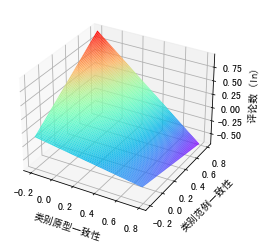

In [24]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

fig = plt.figure(figsize=(4,4))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = np.arange(-0.2,0.8,0.01)
yy = np.arange(-0.2,0.8,0.01)
X, Y = np.meshgrid(xx, yy)
Z = -0.577 * X + 0.794 * Y + -1.338 * X * Y


#作图
ax3.set_xlabel('类别原型一致性')  #为子图设置x轴标题
ax3.set_ylabel('类别范例一致性')    #为子图设置y轴标题
ax3.set_zlabel('评论数 (ln)')    #为子图设置z轴标题
ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1,cmap='rainbow',)
plt.savefig("./temp2.png",dpi=500,bbox_inches = 'tight')
plt.show()

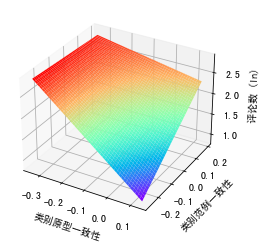

In [144]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置

fig = plt.figure(figsize=(4,4))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = np.arange(-0.34,0.14,0.01)
yy = np.arange(-0.26,0.2,0.01)
X, Y = np.meshgrid(xx, yy)
Z = -2.440 * X + 2.3949 * Y + 7.732 * X * Y + 2


#作图
ax3.set_xlabel('类别原型一致性')  #为子图设置x轴标题
ax3.set_ylabel('类别范例一致性')    #为子图设置y轴标题
ax3.set_zlabel('评论数 (ln)')    #为子图设置z轴标题
ax3.plot_surface(X,Y,Z,rstride = 1, cstride = 1,cmap='rainbow',)
plt.savefig("./temp.png",dpi=500,bbox_inches = 'tight')
plt.show()

In [7]:
df['review_count_ln'] = np.log(df['review_count'])

In [6]:
need_quzhong =  [
 'model_1_average_socre',
 'model_1_top_score',
 'model_1_user_scores_weight',
 'model_1_user_scores_sum',
 'model_2_average_socre',
 'model_2_top_score',
 'model_2_user_scores_weight',
 'model_2_user_scores_sum',
 'vaild_match_mentioned_rate',
 'var_sentiment_score',
 'mean_sentiment_score',
 'vaild_positive_mentioned_rate',
 'vaild_positive_mentioned_rate_xi',
 'sentiment_match_score',
 'sentiment_match_score_sum1',
 'sentiment_match_score_sum2',]

for col in need_quzhong:
    df[col] = df[col] - df[col].mean()

In [89]:
contorl_name_lists = [
 'if_muti_developers',
 'if_famous_developer',
 'if_muti_publishers',
 'if_famous_publishers',
 'if_franchiser',
 'award_bool',
 'if_muti_sys',
 'DLC_bool',
 # 'rating_ao',
 'rating_e',
 'rating_e10',
 'rating_ec',
 'rating_m',
 'rating_rp',
 'rating_t',
 'price_free',
 'price_0_10',
 'price_10_20',
 'price_20_',
 'language_Arabic',
 'language_Bulgarian',
 'language_Czech',
 'language_Danish',
 'language_Dutch',
 # 'language_English',
 'language_Finnish',
 'language_French',
 'language_German',
 'language_Greek',
 'language_Hungarian',
 'language_Italian',
 'language_Japanese',
 'language_Korean',
 'language_Norwegian',
 'language_Polish',
 'language_Portuguese',
 'language_Romanian',
 'language_Russian',
 # 'language_Slovakian',
 'language_Swedish',
 'language_Thai',
 'language_Turkish',
 'language_Ukrainian',
 'language_Vietnamese',
 'language_Portuguese___Brazil',
 'language_Simplified_Chinese',
 'language_Spanish___Latin_America',
 'language_Spanish___Spain',
 'language_Traditional_Chinese',
 'year_2018',
 'year_2019',
 'year_2020',
 'year_2021',
 'cat_action_beat_em_up',
 'cat_action_fps',
 'cat_action_rogue_like',
 'cat_action_run_jump',
 'cat_action_tps',
 'cat_adventure_rpg',
 'cat_anime',
 'cat_arcade_rhythm',
 'cat_casual',
 'cat_exploration_open_world',
 'cat_fighting_martial_arts',
 'cat_horror',
 'cat_metroidvania',
 'cat_multiplayer_coop',
 'cat_multiplayer_lan',
 'cat_multiplayer_local_party',
 'cat_multiplayer_mmo',
 'cat_multiplayer_online_competitive',
 'cat_mystery_detective',
 'cat_puzzle_matching',
 'cat_racing',
 'cat_racing_sim',
 'cat_rogue_like_rogue_lite',
 'cat_rpg_action',
 'cat_rpg_jrpg',
 'cat_rpg_party_based',
 'cat_rpg_strategy_tactics',
 'cat_rpg_turn_based',
 'cat_science_fiction',
 'cat_sim_building_automation',
 'cat_sim_business_tycoon',
 'cat_sim_dating',
 'cat_sim_farming_crafting',
 'cat_sim_life',
 'cat_sim_physics_sandbox',
 'cat_sim_space_flight',
 'cat_space',
 'cat_sports',
 'cat_sports_fishing_hunting',
 'cat_sports_individual',
 'cat_sports_sim',
 'cat_sports_team',
 'cat_story_rich',
 'cat_strategy_card_board',
 'cat_strategy_cities_settlements',
 'cat_strategy_grand_4x',
 'cat_strategy_military',
 'cat_strategy_real_time',
 'cat_strategy_turn_based',
 'cat_survival',
 'cat_tower_defense',
 'cat_visual_novel',
 'feature_Remote_Play_on_TV',
 'feature_Oculus_Rift_DK2',
 'feature_Steam_Workshop',
 'feature_Steam_Achievements',
 'feature_Includes_level_editor',
 'feature_Keyboard___Mouse',
 'feature_Mods__require_HL2_',
 'feature_Downloadable_Content',
 'feature_Cross_Platform_Multiplayer',
 'feature_HTC_Vive',
 'feature_Includes_Source_SDK',
 'feature_Remote_Play_Together',
 'feature_Steam_Turn_Notifications',
 'feature_LAN_PvP',
 'feature_SteamVR_Collectibles',
 'feature_Shared_Split_Screen_Co_op',
 'feature_Captions_available',
 'feature_Online_PvP',
 'feature_Windows_Mixed_Reality',
 'feature_Partial_Controller_Support',
 'feature_Remote_Play_on_Tablet',
 'feature_In_App_Purchases',
 'feature_Steam_Trading_Cards',
 'feature_Tracked_Motion_Controllers',
 'feature_Remote_Play_on_Phone',
 'feature_Commentary_available',
 'feature_Game_demo',
 'feature_Oculus_Rift',
 'feature_Shared_Split_Screen_PvP',
 'feature_Valve_Anti_Cheat_enabled',
 'feature_Steam_Cloud',
 'feature_LAN_Co_op',
 'feature_Full_controller_support',
 'feature_Valve_Index',
 'feature_Steam_Leaderboards',
 'feature_Online_Co_op',
]
contorl_name = ' + '.join(contorl_name_lists)

In [171]:
depent_var = 'review_count_ln'
base_var_name = ['model_1_average_socre','model_1_top_score']
all_var_names = ['model_1_user_scores_weight','vaild_match_mentioned_rate','sentiment_match_score__','var_sentiment_score']
need_muti = ['model_1_user_scores_weight','vaild_match_mentioned_rate','sentiment_match_score__','var_sentiment_score']
total = depent_var + ' ~ '
total += ' + '.join(['model_1_average_socre','model_1_top_score','model_1_top_score * model_1_average_socre'])
for need_var_name in all_var_names:
    total += ' + ' + need_var_name
    if need_var_name in need_muti:
        for base_var in base_var_name:
            muti = base_var + ' * ' + need_var_name
            total += ' + ' + muti
total += '+' + contorl_name
#print(total)
results = smf.ols(total,data=df).fit()
# print(results.aic)
# print(results.bic)
# print(results.rsquared)
# print(results.rsquared_adj)
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        review_count_ln   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     258.9
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:04:21   Log-Likelihood:                -72172.
No. Observations:               44056   AIC:                         1.446e+05
Df Residuals:                   43908   BIC:                         1.459e+05
Df Model:                         147                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------